In [1]:
#imports
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [2]:
matchData = pd.read_csv("C:\\Users\\frank\\OneDrive\\Desktop\\T20Prediction\\Data\\MatchResults.csv")
countries = [
    "India",
    "U.S.A.",
    "Pakistan",
    "Canada",
    "Ireland",
    "Australia",
    "England",
    "Scotland",
    "Namibia",
    "Oman",
    "Afghanistan",
    "West Indies",
    "New Zealand",
    "Uganda",
    "P.N.G.",
    "South Africa",
    "Bangladesh",
    "Sri Lanka",
    "Netherlands",
    "Nepal"
]

matchResultsFiltered = matchData[(matchData['Team1'].isin(countries)) & (matchData['Team2'].isin(countries)) & (matchData['Country'].isin(countries))]
matchResultsFiltered = matchResultsFiltered.dropna()
len(matchResultsFiltered)

823

In [3]:
#Collect Features
# India Win Percentage 
IndiaWinFraction = len(matchResultsFiltered[(matchResultsFiltered['Match Winner'] == 'India')])/len(matchResultsFiltered)
# India WorldCup Wins
IndiaWCWinFraction = len(matchResultsFiltered[((matchResultsFiltered['Series Name'].str.contains('ICC')) & (matchResultsFiltered['Match Winner'] == 'India'))]) / len(matchResultsFiltered[(matchResultsFiltered['Series Name'].str.contains('ICC'))])

In [4]:
X = matchResultsFiltered[['Team1', 'Team2','TossWinner', 'Country']]
y = matchResultsFiltered[['Match Winner']]

categorical_features_X = ['Team1', 'Team2', 'TossWinner', 'Country']
categorical_features_y = ['Match Winner']

encoder_X = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_y = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_encoded = encoder_X.fit_transform(matchResultsFiltered[categorical_features_X])
y_encoded = encoder_y.fit_transform(matchResultsFiltered[categorical_features_y])


print("Encoded X shape:", X_encoded.shape)
print("Encoded y shape:", y_encoded.shape)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.25, random_state=4)

print(encoder_X.categories_)
print(encoder_y.categories_)

print(len(X_train[0]))




Encoded X shape: (823, 74)
Encoded y shape: (823, 19)
[array(['Afghanistan', 'Australia', 'Bangladesh', 'Canada', 'England',
       'India', 'Ireland', 'Namibia', 'Nepal', 'Netherlands',
       'New Zealand', 'Oman', 'P.N.G.', 'Pakistan', 'Scotland',
       'South Africa', 'Sri Lanka', 'Uganda', 'West Indies'], dtype=object), array(['Afghanistan', 'Australia', 'Bangladesh', 'Canada', 'England',
       'India', 'Ireland', 'Namibia', 'Nepal', 'Netherlands',
       'New Zealand', 'Oman', 'P.N.G.', 'Pakistan', 'Scotland',
       'South Africa', 'Sri Lanka', 'Uganda', 'West Indies'], dtype=object), array(['Afghanistan', 'Australia', 'Bangladesh', 'Canada', 'England',
       'India', 'Ireland', 'Namibia', 'Nepal', 'Netherlands',
       'New Zealand', 'Oman', 'P.N.G.', 'Pakistan', 'Scotland',
       'South Africa', 'Sri Lanka', 'Uganda', 'West Indies'], dtype=object), array(['Australia', 'Bangladesh', 'Canada', 'England', 'India', 'Ireland',
       'Namibia', 'Nepal', 'Netherlands', 'New Zeal

In [11]:


# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

'''


model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(90, activation='tanh'),
    Dense(70, activation='tanh'),
    Dense(30, activation='tanh'),
    Dense(y_train.shape[1], activation='tanh') 
])

custom_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='adam'
)

model.compile(optimizer=custom_optimizer,
              loss='categorical_crossentropy',  # or 'sparse_categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])
              
              '''

C:\Users\frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


"\n\n\nmodel = Sequential([\n    Input(shape=(X_train.shape[1],)),\n    Dense(90, activation='tanh'),\n    Dense(70, activation='tanh'),\n    Dense(30, activation='tanh'),\n    Dense(y_train.shape[1], activation='tanh') \n])\n\ncustom_optimizer = tf.keras.optimizers.Adam(\n    learning_rate=0.001,\n    beta_1=0.9,\n    beta_2=0.999,\n    epsilon=1e-07,\n    amsgrad=False,\n    weight_decay=None,\n    clipnorm=None,\n    clipvalue=None,\n    global_clipnorm=None,\n    use_ema=False,\n    ema_momentum=0.99,\n    ema_overwrite_frequency=None,\n    loss_scale_factor=None,\n    gradient_accumulation_steps=None,\n    name='adam'\n)\n\nmodel.compile(optimizer=custom_optimizer,\n              loss='categorical_crossentropy',  # or 'sparse_categorical_crossentropy' for multi-class classification\n              metrics=['accuracy'])\n              \n              "

In [12]:
history = model.fit(X_train, y_train, epochs=3000, batch_size=32, validation_split=0.2, verbose=0)

Text(0.5, 0, 'epoch')

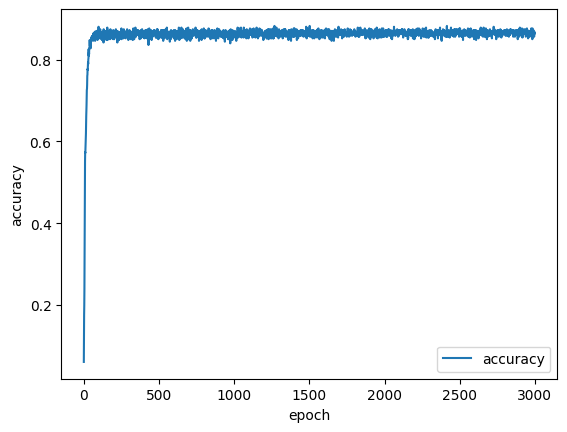

In [13]:
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

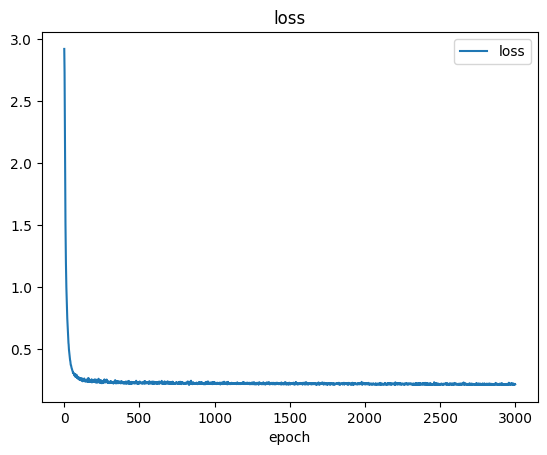

In [14]:
plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5358 - loss: 9.8773  
Test loss: 7.725465774536133
Test accuracy: 0.5485436916351318


In [19]:
decoded_x = encoder_X.inverse_transform(X_test)
y_predicted = model.predict(X_test)
y_predicted = encoder_y.inverse_transform(y_predicted)
for match in range(len(decoded_x)):
    print("Match Number :: {}".format(match))
    print(" {} vs {} ".format(decoded_x[match][0],decoded_x[match][1]))
    print("Winner {}".format(y_predicted[match][0]))
    print()
print(decoded_x,encoder_y.inverse_transform(y_predicted))



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Match Number :: 0
 Oman vs Ireland 
Winner India

Match Number :: 1
 West Indies vs India 
Winner India

Match Number :: 2
 Pakistan vs South Africa 
Winner South Africa

Match Number :: 3
 Sri Lanka vs Australia 
Winner Australia

Match Number :: 4
 India vs Australia 
Winner India

Match Number :: 5
 Pakistan vs Sri Lanka 
Winner Pakistan

Match Number :: 6
 England vs Australia 
Winner Australia

Match Number :: 7
 Pakistan vs Scotland 
Winner Pakistan

Match Number :: 8
 Namibia vs Nepal 
Winner Nepal

Match Number :: 9
 Afghanistan vs Sri Lanka 
Winner Sri Lanka

Match Number :: 10
 Pakistan vs New Zealand 
Winner Pakistan

Match Number :: 11
 Ireland vs Bangladesh 
Winner New Zealand

Match Number :: 12
 India vs England 
Winner England

Match Number :: 13
 Sri Lanka vs India 
Winner India

Match Number :: 14
 South Africa vs West Indies 
Winner South Africa

Match Number :: 15
 Bangladesh vs Ireland 
Winner Bangladesh

Match Number :: 16
 Af

ValueError: could not convert string to float: 'India'

In [ ]:
for i in range(len(X_test)):
    
    output = encoder_y.inverse_transform(model.predict(X_test))
    print(output)